# 1. Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 2. Datasets

In [2]:
# Load datasets
USArrest = pd.read_csv('./USArrest.csv')
USstatearea = pd.read_csv('./USstatearea.csv')
USstatecenter = pd.read_csv('./USstatecenter.csv')
USstatedivision = pd.read_csv('./USstatedivision.csv')
USstateregion = pd.read_csv('./USstateregion.csv')
USstatex77 = pd.read_csv('./USstatex77.csv')

In [3]:
USArrest.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
USstatearea.head()

,Unnamed: 0,x
0,1,51609
1,2,589757
2,3,113909
3,4,53104
4,5,158693


In [5]:
USstatecenter.head()

,Unnamed: 0,x,y
0,1,-86.7509,32.5901
1,2,-127.2500,49.2500
2,3,-111.6250,34.2192
3,4,-92.2992,34.7336
4,5,-119.7730,36.5341


In [6]:
USstatedivision.head()

,Unnamed: 0,x
0,1,East South Central
1,2,Pacific
2,3,Mountain
3,4,West South Central
4,5,Pacific


In [7]:
USstateregion.head()

,Unnamed: 0,x
0,1,South
1,2,West
2,3,West
3,4,South
4,5,West


In [8]:
USstatex77.head()

,Unnamed: 0,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area
0,Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
1,Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
2,Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
3,Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
4,California,21198,5114,1.1,71.71,10.3,62.6,20,156361


# 3. Data Processing

In [9]:
# Combine USArrest with USstatearea
USArrest.rename(columns={'Unnamed: 0': 'State'}, inplace=True)
merged_1 = pd.concat([USArrest,USstatearea], axis=1)
merged_1.drop(columns='Unnamed: 0', inplace=True)
merged_1.rename(columns={'x': 'Area'}, inplace=True)

In [10]:
merged_1.head()

,State,Murder,Assault,UrbanPop,Rape,Area
0,Alabama,13.2,236,58,21.2,51609
1,Alaska,10.0,263,48,44.5,589757
2,Arizona,8.1,294,80,31.0,113909
3,Arkansas,8.8,190,50,19.5,53104
4,California,9.0,276,91,40.6,158693


In [11]:
# Combine merged_1 with USstatecenter
merged_2 = pd.concat([merged_1,USstatecenter], axis=1)
merged_2.drop(columns='Unnamed: 0', inplace=True)
merged_2.rename(columns={'x': 'Longitude', 'y':'Latitude'}, inplace=True)

In [12]:
merged_2.head()

,State,Murder,Assault,UrbanPop,Rape,Area,Longitude,Latitude
0,Alabama,13.2,236,58,21.2,51609,-86.7509,32.5901
1,Alaska,10.0,263,48,44.5,589757,-127.2500,49.2500
2,Arizona,8.1,294,80,31.0,113909,-111.6250,34.2192
3,Arkansas,8.8,190,50,19.5,53104,-92.2992,34.7336
4,California,9.0,276,91,40.6,158693,-119.7730,36.5341


In [13]:
# Combine merged_2 with USstatedivision
merged_3 = pd.concat([merged_2,USstatedivision], axis=1)
merged_3.drop(columns='Unnamed: 0', inplace=True)
merged_3.rename(columns={'x': 'Division'}, inplace=True)

In [14]:
merged_3.head()

,State,Murder,Assault,UrbanPop,Rape,Area,Longitude,Latitude,Division
0,Alabama,13.2,236,58,21.2,51609,-86.7509,32.5901,East South Central
1,Alaska,10.0,263,48,44.5,589757,-127.2500,49.2500,Pacific
2,Arizona,8.1,294,80,31.0,113909,-111.6250,34.2192,Mountain
3,Arkansas,8.8,190,50,19.5,53104,-92.2992,34.7336,West South Central
4,California,9.0,276,91,40.6,158693,-119.7730,36.5341,Pacific


In [15]:
# Combine merged_3 with USstateregion
merged_4 = pd.concat([merged_3,USstateregion], axis=1)
merged_4.drop(columns='Unnamed: 0', inplace=True)
merged_4.rename(columns={'x': 'Region'}, inplace=True)

In [16]:
merged_4.head()

,State,Murder,Assault,UrbanPop,Rape,Area,Longitude,Latitude,Division,Region
0,Alabama,13.2,236,58,21.2,51609,-86.7509,32.5901,East South Central,South
1,Alaska,10.0,263,48,44.5,589757,-127.2500,49.2500,Pacific,West
2,Arizona,8.1,294,80,31.0,113909,-111.6250,34.2192,Mountain,West
3,Arkansas,8.8,190,50,19.5,53104,-92.2992,34.7336,West South Central,South
4,California,9.0,276,91,40.6,158693,-119.7730,36.5341,Pacific,West


In [17]:
# Combine merged_4 with USstatex77
merged_5 = pd.concat([merged_4,USstatex77], axis=1)
merged_5.drop(columns='Unnamed: 0', inplace=True)

In [18]:
merged_5.head()

,State,Murder,Assault,UrbanPop,Rape,Area,Longitude,Latitude,Division,Region,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area
0,Alabama,13.2,236,58,21.2,51609,-86.7509,32.5901,East South Central,South,3615,3624,2.1,69.05,15.1,41.3,20,50708
1,Alaska,10.0,263,48,44.5,589757,-127.2500,49.2500,Pacific,West,365,6315,1.5,69.31,11.3,66.7,152,566432
2,Arizona,8.1,294,80,31.0,113909,-111.6250,34.2192,Mountain,West,2212,4530,1.8,70.55,7.8,58.1,15,113417
3,Arkansas,8.8,190,50,19.5,53104,-92.2992,34.7336,West South Central,South,2110,3378,1.9,70.66,10.1,39.9,65,51945
4,California,9.0,276,91,40.6,158693,-119.7730,36.5341,Pacific,West,21198,5114,1.1,71.71,10.3,62.6,20,156361


In [19]:
# Remove irrelevant features
X = merged_5.drop(columns=['State', 'Population', 'Murder', 'Area'])

In [20]:
X.head()

,Assault,UrbanPop,Rape,Longitude,Latitude,Division,Region,Income,Illiteracy,Life Exp,HS Grad,Frost
0,236,58,21.2,-86.7509,32.5901,East South Central,South,3624,2.1,69.05,41.3,20
1,263,48,44.5,-127.2500,49.2500,Pacific,West,6315,1.5,69.31,66.7,152
2,294,80,31.0,-111.6250,34.2192,Mountain,West,4530,1.8,70.55,58.1,15
3,190,50,19.5,-92.2992,34.7336,West South Central,South,3378,1.9,70.66,39.9,65
4,276,91,40.6,-119.7730,36.5341,Pacific,West,5114,1.1,71.71,62.6,20


# 4. Data Processing for K-means Clustering 

In [21]:
# One-hot encoding for Division, Region
X = pd.get_dummies(X, columns=['Division', 'Region'])
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [22]:
X.head()

,Assault,UrbanPop,Rape,Longitude,Latitude,Income,Illiteracy,Life Exp,HS Grad,Frost,...,Division_Mountain,Division_New England,Division_Pacific,Division_South Atlantic,Division_West North Central,Division_West South Central,Region_North Central,Region_Northeast,Region_South,Region_West
0,236,58,21.2,-86.7509,32.5901,3624,2.1,69.05,41.3,20,...,0,0,0,0,0,0,0,0,1,0
1,263,48,44.5,-127.2500,49.2500,6315,1.5,69.31,66.7,152,...,0,0,1,0,0,0,0,0,0,1
2,294,80,31.0,-111.6250,34.2192,4530,1.8,70.55,58.1,15,...,1,0,0,0,0,0,0,0,0,1
3,190,50,19.5,-92.2992,34.7336,3378,1.9,70.66,39.9,65,...,0,0,0,0,0,1,0,0,1,0
4,276,91,40.6,-119.7730,36.5341,5114,1.1,71.71,62.6,20,...,0,0,1,0,0,0,0,0,0,1


In [23]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. K-means Clustering

c:\Users\Chun Quan\anaconda3\envs\cq1\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Chun Quan\anaconda3\envs\cq1\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Chun Quan\anaconda3\envs\cq1\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Chun Quan\anaconda3\envs\cq1\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

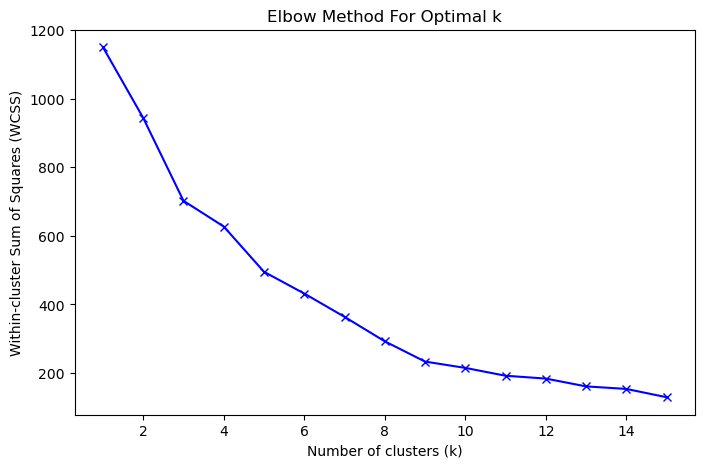

In [24]:
# Elbow Method to find optimal number of clusters, k
wcss = []
K = range(1, 16)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.show() # Optimal k = 9

In [25]:
# K-means Clustering
best_k = 9
kmeans = KMeans(n_clusters=best_k, random_state=42)
merged_5['Cluster'] = kmeans.fit_predict(X_scaled)

c:\Users\Chun Quan\anaconda3\envs\cq1\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
# Change cluster labels starting from 1 instead of 0
cluster_mapping = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9}
merged_5['Cluster'] = merged_5['Cluster'].map(cluster_mapping)

In [27]:
merged_5.head()

,State,Murder,Assault,UrbanPop,Rape,Area,Longitude,Latitude,Division,Region,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area,Cluster
0,Alabama,13.2,236,58,21.2,51609,-86.7509,32.5901,East South Central,South,3615,3624,2.1,69.05,15.1,41.3,20,50708,9
1,Alaska,10.0,263,48,44.5,589757,-127.2500,49.2500,Pacific,West,365,6315,1.5,69.31,11.3,66.7,152,566432,8
2,Arizona,8.1,294,80,31.0,113909,-111.6250,34.2192,Mountain,West,2212,4530,1.8,70.55,7.8,58.1,15,113417,3
3,Arkansas,8.8,190,50,19.5,53104,-92.2992,34.7336,West South Central,South,2110,3378,1.9,70.66,10.1,39.9,65,51945,2
4,California,9.0,276,91,40.6,158693,-119.7730,36.5341,Pacific,West,21198,5114,1.1,71.71,10.3,62.6,20,156361,8


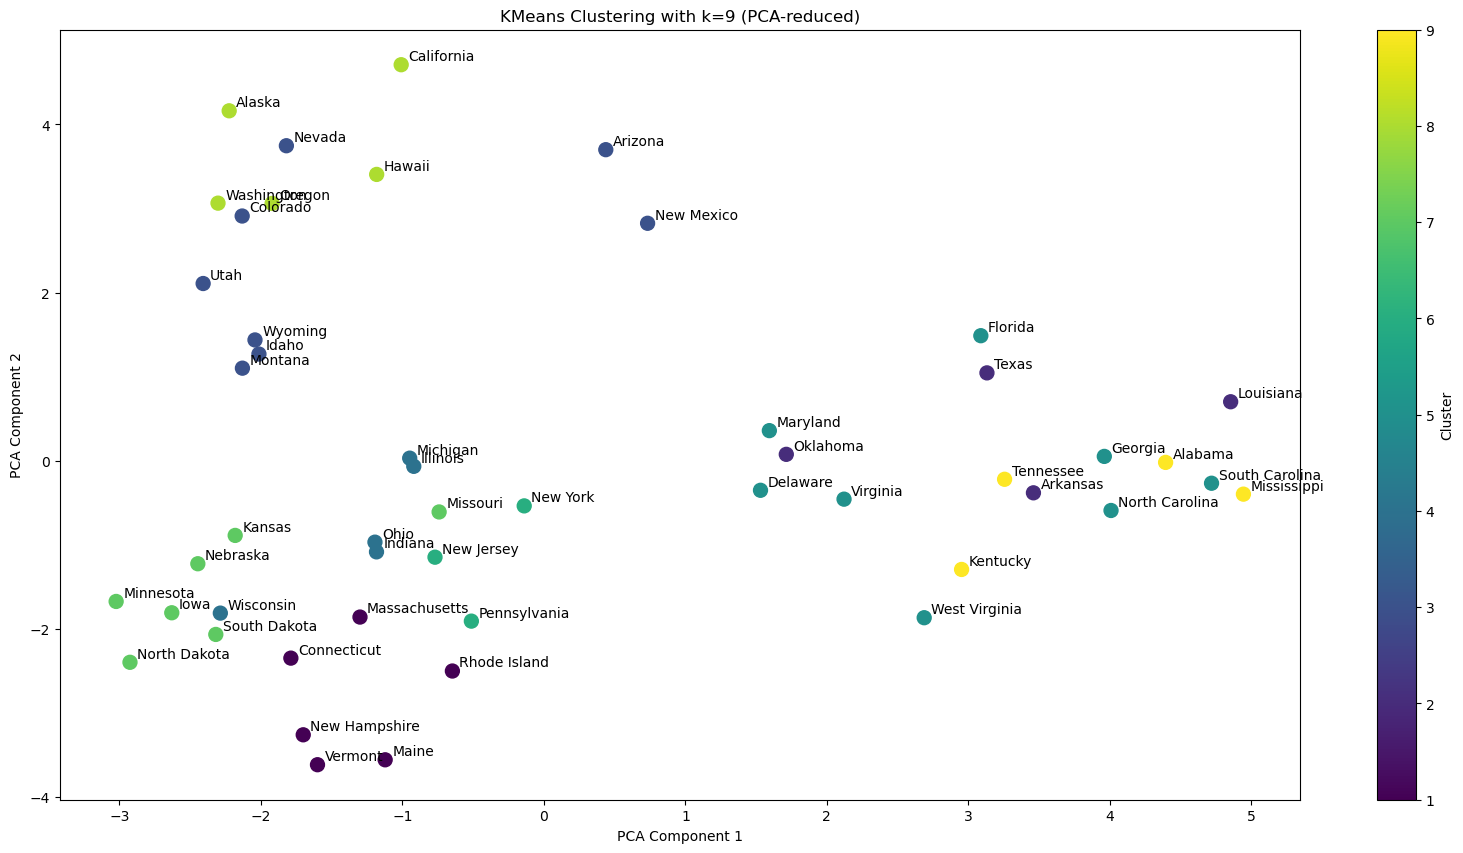

             State  Cluster
0          Alabama        9
1           Alaska        8
2          Arizona        3
3         Arkansas        2
4       California        8
5         Colorado        3
6      Connecticut        1
7         Delaware        5
8          Florida        5
9          Georgia        5
10          Hawaii        8
11           Idaho        3
12        Illinois        4
13         Indiana        4
14            Iowa        7
15          Kansas        7
16        Kentucky        9
17       Louisiana        2
18           Maine        1
19        Maryland        5
20   Massachusetts        1
21        Michigan        4
22       Minnesota        7
23     Mississippi        9
24        Missouri        7
25         Montana        3
26        Nebraska        7
27          Nevada        3
28   New Hampshire        1
29      New Jersey        6
30      New Mexico        3
31        New York        6
32  North Carolina        5
33    North Dakota        7
34            Ohio  

In [28]:
# Create a PCA plot for visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(20,10))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=merged_5['Cluster'], cmap='viridis', s=100)
for i, state in enumerate(merged_5['State']):
    plt.text(X_pca[i,0]+0.05, X_pca[i,1]+0.05, state)
plt.title(f'KMeans Clustering with k={best_k} (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

print(merged_5[['State', 'Cluster']])

In [29]:
# Save cluster output
merged_5.to_csv('./Classification of US States.csv', index=False)